### Importing all necessary Libraries 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

### loading the dataset

In [8]:
data_1 = pd.read_csv("Fraud.csv")

###### Showing the first seven rows of dataset

In [9]:
data_1.head(7)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


## Data cleaning and preprocessing

### finding the null values 

In [10]:
data_1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### if there is null values then remove it using the dropna function

In [11]:
data_1 = data_1.dropna()

#### crosscheck if all NaN values are removed or not 

In [12]:
data_1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### check the redundent or duplicate rows

In [13]:
data_1[data_1.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


## Outliers 

In [ ]:
plotting = data_1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]
plotting.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(15, 6),
    grid=0.5
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

# we will person some of the operation to treat outliers
# some of them are 
# winsoriztion, trimming, capping

#### assign the target value to target variable 

In [14]:
target = data_1['isFraud']

In [15]:
target

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

#### Drop the specific columns 

In [16]:
data_2 = data_1.drop(columns = ['step', 'nameOrig', 'isFlaggedFraud', 'isFraud'], axis = 1)

In [17]:
data_2

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.00,160296.36,M1979787155,0.00,0.00
1,PAYMENT,1864.28,21249.00,19384.72,M2044282225,0.00,0.00
2,TRANSFER,181.00,181.00,0.00,C553264065,0.00,0.00
3,CASH_OUT,181.00,181.00,0.00,C38997010,21182.00,0.00
4,PAYMENT,11668.14,41554.00,29885.86,M1230701703,0.00,0.00
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,C776919290,0.00,339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11
6362618,TRANSFER,850002.52,850002.52,0.00,C2080388513,0.00,0.00


#### convert the nameDest column values using re lirary and wildcard operator 

In [18]:
# Function to replace values using regular expressions
import re
def replace_values(val):
    if re.match(r'^M\d+$', val):
        return 'M'
    elif re.match(r'^C\d+$', val):
        return 'C'
    else:
        return val

# Apply the function to the 'values' column
data_2['nameDest'] = data_2['nameDest'].apply(replace_values)

In [19]:
data_2

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.00,160296.36,M,0.00,0.00
1,PAYMENT,1864.28,21249.00,19384.72,M,0.00,0.00
2,TRANSFER,181.00,181.00,0.00,C,0.00,0.00
3,CASH_OUT,181.00,181.00,0.00,C,21182.00,0.00
4,PAYMENT,11668.14,41554.00,29885.86,M,0.00,0.00
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,C,0.00,339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,C,0.00,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,C,68488.84,6379898.11
6362618,TRANSFER,850002.52,850002.52,0.00,C,0.00,0.00


#### use one hot encoder to create dummy columns 
#### convert the categorical data into the numerical data

In [20]:
data_3 = pd.get_dummies(data_2, columns = ['type', 'nameDest'])

In [21]:
data_3

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C,nameDest_M
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0,0,1
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0,0,1
2,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1,1,0
3,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0,1,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0,1,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1,1,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0,1,0
6362618,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1,1,0


### Calculate the correlation matrix 

In [31]:
correlation_matrix = data_3.corr()

### Plot the heatmap

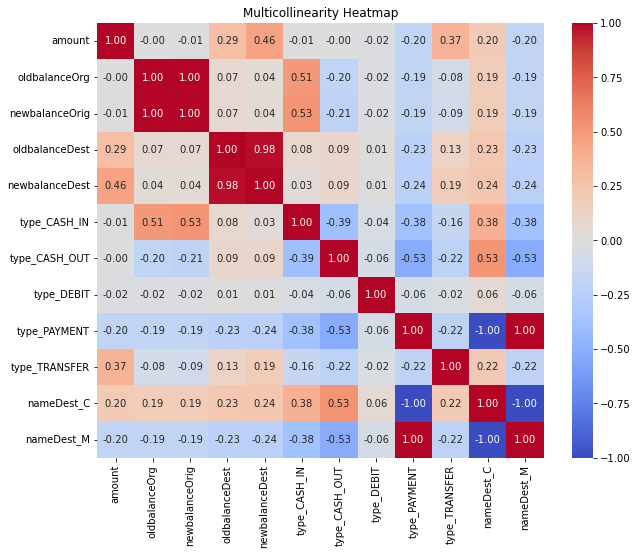

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Multicollinearity Heatmap')
plt.show()

## Split the model between training  and testing data 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data_3, target, test_size = 0.30, random_state = 0)

#### total number of rows and columns in training and testing dataset 

In [23]:
x_train.shape, x_test.shape, target.shape

((4453834, 12), (1908786, 12), (6362620,))

In [24]:
y_train.shape, y_test.shape, target.shape

((4453834,), (1908786,), (6362620,))

#### Standardize the data using standard Scaler 

In [25]:
st_x = StandardScaler()
x_train_ss = st_x.fit_transform(x_train)
x_test_ss = st_x.transform(x_test)

## load the ML model 

In [26]:
logclassifier = LogisticRegression(random_state = 0)
decisiontreeclassifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
knnclassifier = KNeighborsClassifier(n_neighbors=5)
naivebayes = GaussianNB()

### Logistic Regression Classifier and vizualization

0.9978881116808574 0.997848370639768
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.35      0.80      0.48      2419

    accuracy                           1.00   1908786
   macro avg       0.67      0.90      0.74   1908786
weighted avg       1.00      1.00      1.00   1908786



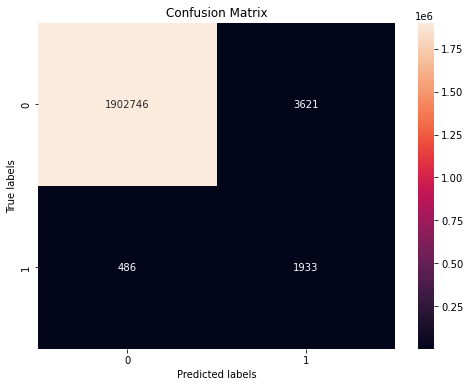

In [28]:
logclassifier.fit(x_train, y_train)
x_train_predict_log = logclassifier.predict(x_train)
log_train_accuracy = accuracy_score(x_train_predict_log, y_train)
x_test_predict_log = logclassifier.predict(x_test)
log_test_accuracy = accuracy_score(x_test_predict_log, y_test)
print(log_train_accuracy, log_test_accuracy)

print("Classification Report:")
print(classification_report(y_test, x_test_predict_log))

# Calculate confusion matrix
cm = confusion_matrix(y_test, x_test_predict_log)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree Classifier and vizualization

1.0 0.9997411967606635
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.90      0.89      0.90      2419

    accuracy                           1.00   1908786
   macro avg       0.95      0.95      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



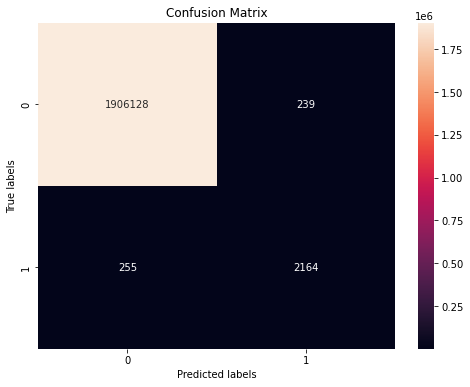

In [29]:
decisiontreeclassifier.fit(x_train, y_train)
x_train_predict_decision = decisiontreeclassifier.predict(x_train)
decision_train_accuracy = accuracy_score(x_train_predict_decision, y_train)
x_test_predict_decision = decisiontreeclassifier.predict(x_test)
decision_test_accuracy = accuracy_score(x_test_predict_decision, y_test)
print(decision_train_accuracy, decision_test_accuracy)

print("Classification Report:")
print(classification_report(y_test, x_test_predict_decision))

# Calculate confusion matrix
cm = confusion_matrix(y_test, x_test_predict_decision)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

SVM classifier / it will take lot of time for running so be cautious before running the code

In [33]:
# svmclassifier = SVC(kernel = "linear", random_state = 0)
# svmclassifier.fit(x_train, y_train)
# x_train_predict_svm = svmclassifier.predict(x_train)
# accuracy_score(x_train_predict_svm, y_train)
# x_test_predict_svm = svmclassifier.predict(x_test)
# accuracy_score(x_test_predict_svm, y_test)
# print(confusion_matrix(y_test, x_test_predict_svm))

### KNN classifier and vizualization

In [ ]:
knnclassifier.fit(x_train, y_train)
x_train_predict_knn = knnclassifier.predict(x_train)
knn_train_accuracy = accuracy_score(x_train_predict_knn, y_train)
x_test_predict_knn = knnclassifier.predict(x_test)
knn_test_accuracy = accuracy_score(x_test_predict_knn, y_test)
print(knn_train_accuracy, knn_test_accuracy)


print("Classification Report:")
print(classification_report(y_test, x_test_predict_knn))

# Calculate confusion matrix
cm = confusion_matrix(y_test, x_test_predict_knn)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes and vizualization

0.9919238121582439 0.992089212724737
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906367
           1       0.03      0.17      0.05      2419

    accuracy                           0.99   1908786
   macro avg       0.51      0.58      0.52   1908786
weighted avg       1.00      0.99      0.99   1908786



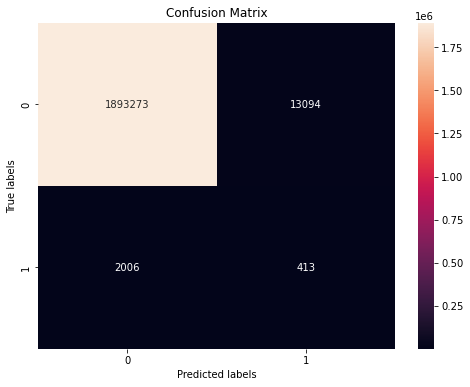

In [30]:
naivebayes = GaussianNB()
naivebayes.fit(x_train, y_train)
x_train_predict_nb = naivebayes.predict(x_train)
nb_train_accuracy = accuracy_score(x_train_predict_nb, y_train)
x_test_predict_nb = naivebayes.predict(x_test)
nb_test_accuracy = accuracy_score(x_test_predict_nb, y_test)
print(nb_train_accuracy, nb_test_accuracy)

print("Classification Report:")
print(classification_report(y_test, x_test_predict_nb))

# Calculate confusion matrix
cm = confusion_matrix(y_test, x_test_predict_nb)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Candidate Expectations Answers  

### 1) Data cleaning including missing values, outliers and multi-collinearity

i) we first check is there any null values in any of the column using the isnull() function, then we remove the null values

ii) we then check the duplicate rows in the dataset using duplicated() function so we come to know that there is no duplicate values

iii) then we will check the outliers using the box plot 

iv) removed the columns which are not required for model training and some of them
    •	Step (will use later for visualiztion)
    •	nameOrig
    •	isFraud (will use as output)
    •	isFlaggedFraud
    
v) convert all the merchant account name with the “M” and convert the customer account name with the “C”. all these changes are dome only in nameDest column

vi) used the one hot encoder which has helped us in coverting all the categorical data into the numerical values where we have created different columns for different categorical values
for type column where we have 5 options so we have created 5 columns
for nameDest column we have 2 options so we have created 2 columns


### 2) Describe your fraud detection model in elaboration.  

i) after implementing the data cleaning process we will select the machine learning algorithms like

    •	svm : it will create the hyperplane which will divide the sides (it is taking a lot of time in this dataset because of high dimensionality and large volume of data)
    
    •	knn: it will find the nearest point values and according to it, it wil assign the value
    
    •	logistic regression: the sigmoid function is quite fast model in terms of training and gives    efficient model
    
    •	decision tree: it will create the tree like sturcture and tell the output in more accurate way
    
    •	naïve bayes: it is based on bayes theorem it assumes that all the columns are indepenedent of each other and it is fast in terms of processing and training

    
ii) in this we have separated the target column that is the “isFraud” column and have assign it different variable 

iii) we will implement the machine learning models on all the remaining columns

### 3) How did you select variables to be included in the model? 

i) columns we selected are the and the reasons are given below

    •	amount	 : (it is one of the main factor will tell us what is because transferred, cashed out or debited etc)
    
    •	oldbalanceOrg: (it will tell the original balance and we can check with the amount that whether amount which is request to be taken out is legit or not)	
    
    •	newbalanceOrg: (it will tell the balance after the specific amount is taken out so it will help us in checking the consistency)
    
    •	oldbalanceDest	: (it will tell the old balance of recipient which will help us in checking the consistency)

    •	newbalanceDest: (it will tell the new balance after specific amount is added so this will also help us in evaluating the consistency among the transaction and it is one of the main variables)

    •	type : (it will tell the mode of operation and reason we added is because it will help us identifying the mode of transaction where fraud usually occurs)
    
    •	nameDest: (it will tell us the two types of account one of merchant which changed to M in data preprocessing stage and customer account to c, it will help us in telling in which accounts do fraud happens more)

ii) columns we removed and the reasons are given below
    
    •	step: (it will not help us in predicting the predicting fraud as it is not directly connected as it is just time values given in numerical value, but we can use this column in vizuation part so as to know fraud time occurance and their frequency)
    
    •	nameOrig: (as it is only the customer account name and most of the values are unique so if we apply model on it, it will ultimately will increase the complexity of the model)
    
    •	isFraud: (we will use this column as the output or the target column)
    
    •	isFlaggedFraud: (this column only have 16 values which are flagged as fraud so it is a very small number compared to the total fraud values in isFraud column which is 8213 so it will not have that much effect)


### 4. Demonstrate the performance of the model by using best set of tools. 

i) to demonstrate the performance of the model we have used many of the factors like the 
    •	accuracy
    •	precision
    •	recall
    •	f1 score 
    •	confusion matrix ( which will tell us all 4 possibilities and also type 1 error and type 2 error)

ii) we will also use some types of data visualization elements like the histogram, bar chart for better understanding

### 5. What are the key factors that predict fraudulent customer? 

i) the key factors which will help us in predicting the fraudulent customers are the 
    •	type of payment
    •	Name Dest
    •	Amount

### 6. Do these factors make sense? If yes, How? If not, How not? 

1)	type of payment
    o	by doing the analysis we come to know that most of the fraudulent transactions were being done by using the transfer and cash out mode 
    o	rest in all the other modes it has reported 0 fraudulant activities

2)	Name Dest
    o	By doing the analysis we come to know that only the customer account have found with fraudulent activity and in merchant account 0 fraudulant activities found

3)	Amount
    o	Amount that is being transferred from sender to recipient and how much money is cashed out etc will matter


### 7. What kind of prevention should be adopted while company update its infrastructure? 

i) the preventive measures the company should adopt to reduce the fraudulent activities is 
    
    o	Company should monitor transfer and cash out type more closely as they are the once which are more prone to fraudulent acitivities
    
    o	Company should promote customer to not transfer some big amount directly to another customer account, company should check the previous track record of that recipient account
    
    o	After the thorough investigation, then company should generate a value which will help the customer in identifying whether the account is genuine account or not
    
    o	Company should ban those accounts which are being found in performing fraudulent transaction


### 8. Assuming these actions have been implemented, how would you determine if they work 

i) if all the actions are implemented successfully then we will determine the working by the following ways
    
    •	we will again preprocess and implement the ml model on the transactions dataset which company will collect after the implementation (which we got earilier similar like that)
    
    •	If the ratio of fraud is to legitimate transactions decreased from previous ratio then we can say that we are on right path and if the ratio increases than we have to find some other ways to tackle the issue
    
    •   We will try to find new accounts which are performing fraudulent transaction and will blacklist them from further transaction
    
    •	We will try to unravel the patterns which will arise in future by changing in some of the transaction policy
